In [47]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.decomposition import PCA

In [2]:
patients = {'11':'#da70d6', '21': '#9acd32', '23':'#cd5c5c', '27':'#7d0f0f', '75':'#808000', 
            '99':'#add8e6', '109':'#3b65a8', '141':'#663399', '216':'#8b008b', '5': '#d42f81'}
culture = {'PDO':'#008C26', 'PDOF':'#FF7F7F', 'F':'blue'}
treatment = {'DMSO':'#000000', 'H2O':'#000000', 'AH':'#000000', 'S':'#0433FF', 'VS':'#011993', 'L':'#F2AE40', 'F':'#942193', 
             'C':'#B7933A', 'CS':'#005493', 'CSF':'#0096FF', 'SF':'#7A81FF', 'V':'#FFD479', 'CF':'#941751', 'O':'#38774F'} 

In [3]:
treatment_short = {'Oxaliplatin': 'O' , 'SN-38': 'S', 'SN-38 + VX-970': "VS", 'LGK-974': 'L', 'VX-970': 'V',
       '5-FU': 'F', 'Cetux': 'C', 'SN-38 + Cetux': 'CS', '5-FU + Cetux': "CF",
       'SN-38 + 5-FU + Cetux': "CSF", 'SN-38 + 5-FU': "SF"}

In [4]:
markers = np.array(['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK',
       'GFP', 'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG',
       'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB',
       'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38',
       'pMAPKAPK', 'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK',
       'pP120_catenin', 'Beta_catenin_active', 'pGSK', 'pERK1_2',
       'pSMAD2_3', 'PLK', 'CHGA', 'pDNAPK', 'pS6', 'CD90', 'cPARP',
       'pCHK1'], dtype=object)

In [5]:
markers[-2]

'cPARP'

In [10]:
d27["treatment"][3]

'SN-38'

In [11]:
d27["treatment"][3]

'SN-38'

In [9]:
d27 = np.load("/scratch/ssd004/scratch/lazar/iclr_mfm_rebuttal/embeddings_patients/mfm_predictions_and_embeds_patients_pdo27_rev2.pkl", allow_pickle=True)
d21 = np.load("/scratch/ssd004/scratch/lazar/iclr_mfm_rebuttal/embeddings_patients/mfm_predictions_and_embeds_patients_pdo21_rev2.pkl", allow_pickle=True)
d75 = np.load("/scratch/ssd004/scratch/lazar/iclr_mfm_rebuttal/embeddings_patients/mfm_predictions_and_embeds_patients_pdo75_rev2.pkl", allow_pickle=True)

In [12]:
d27.keys()

dict_keys(['patient', 'source', 'target', 'pred', 'treatment', 'culture', 'cell_cond', 'embed'])

In [13]:
for k in d21.keys():
    print(d21[k][0])

('pdo-21',)
tensor([[[-0.2830, -0.4234, -0.8854,  ..., -2.3673, -0.2993, -2.0332],
         [-0.2830,  2.2091,  2.9602,  ..., -2.3673, -0.5462, -0.5865],
         [ 0.5602,  1.0774,  1.5631,  ..., -1.9603, -1.0174, -0.7230],
         ...,
         [-0.2830, -0.4756,  1.5128,  ..., -2.3673,  0.1022, -2.1985],
         [-0.2830,  0.5504,  1.8359,  ..., -2.3673, -1.0199, -1.0138],
         [-0.2830,  1.6098,  2.3041,  ..., -2.3673, -0.6828, -0.6674]]],
       device='cuda:0')
tensor([[[-0.2830,  2.2149,  2.5989,  ..., -2.3673, -2.0308, -2.3516],
         [-0.2830,  1.3326,  1.9439,  ..., -1.7825, -0.2803, -1.4751],
         [-0.2830,  1.5491,  2.1675,  ..., -2.3673, -0.6376, -0.8439],
         ...,
         [-0.2830,  2.2788,  2.8772,  ..., -2.3673, -2.0308, -3.0056],
         [-0.2830, -0.4756, -0.2674,  ..., -2.3673, -0.9508, -2.4843],
         [-0.2830,  1.0112,  1.6915,  ..., -1.9777, -0.6478, -0.4968]]],
       device='cuda:0')
tensor([[-0.3951, -0.5656, -1.1279,  ..., -2.4304,  0.23

In [16]:
treated_df = pd.DataFrame(d27["target"][3].squeeze().cpu(), columns=markers)
source_df = pd.DataFrame(d27["source"][3].squeeze().cpu(), columns=markers)
pred_df = pd.DataFrame(d27["pred"][3].squeeze().cpu(), columns=markers)

In [17]:
import umap
treated_embedding = umap.UMAP().fit_transform(treated_df)
source_embedding = umap.UMAP().fit_transform(source_df)
pred_embedding = umap.UMAP().fit_transform(pred_df)

In [18]:
markers

array(['pHH3', 'RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18', 'Pan_CK',
       'GFP', 'IdU', 'pPDK1', 'cCaspase_3', 'Geminin', 'pMEK1_2', 'pNDRG',
       'pMKK4_SEK1', 'pBTK', 'pSRC', 'p4EBP1', 'pRB', 'pAKT308', 'pCREB',
       'pSMAD1_5_9', 'pAKT473', 'pNF_kB', 'pMKK3_MKK6', 'pP38',
       'pMAPKAPK', 'pAMPKa', 'pBAD', 'pHistone_H2A', 'p90RSK',
       'pP120_catenin', 'Beta_catenin_active', 'pGSK', 'pERK1_2',
       'pSMAD2_3', 'PLK', 'CHGA', 'pDNAPK', 'pS6', 'CD90', 'cPARP',
       'pCHK1'], dtype=object)

(array([ 115.,  816.,  381.,  543.,  975., 1261.,  777.,  101.,   25.,
           6.]),
 array([-3.14266801, -2.60399628, -2.06532454, -1.52665269, -0.9879809 ,
        -0.44930911,  0.08936267,  0.62803447,  1.1667062 ,  1.70537806,
         2.24404979]),
 <BarContainer object of 10 artists>)

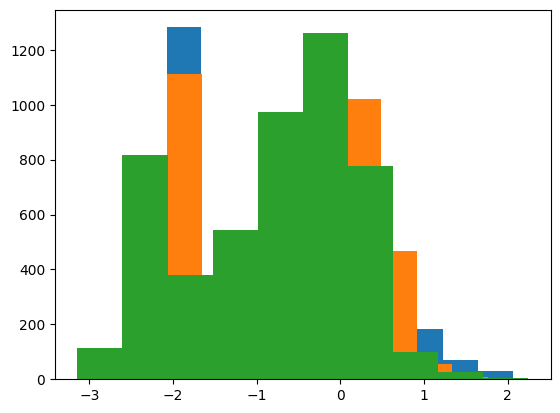

In [19]:
plt.hist(treated_df["cPARP"])
plt.hist(source_df["cPARP"])
plt.hist(pred_df["cPARP"])

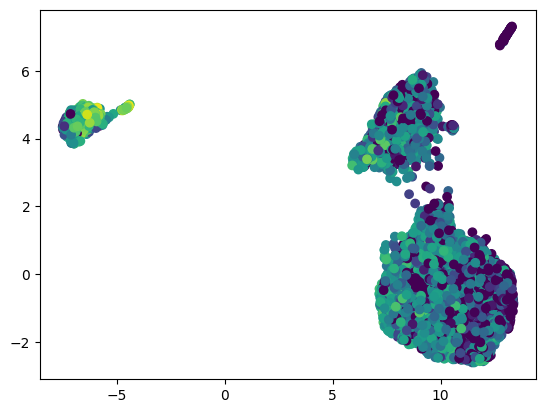

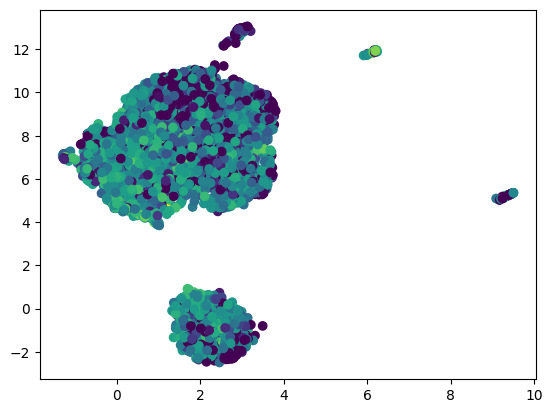

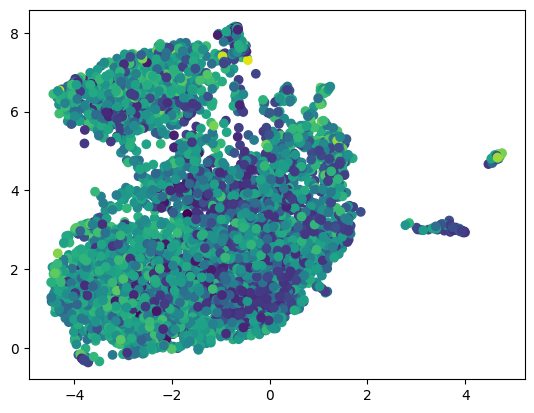

In [20]:
for embedding, df in [(treated_embedding, treated_df), (source_embedding, source_df), (pred_embedding, pred_df)]:
    plt.scatter(embedding[:,0], embedding[:,1], c=df["cPARP"])
    plt.show()


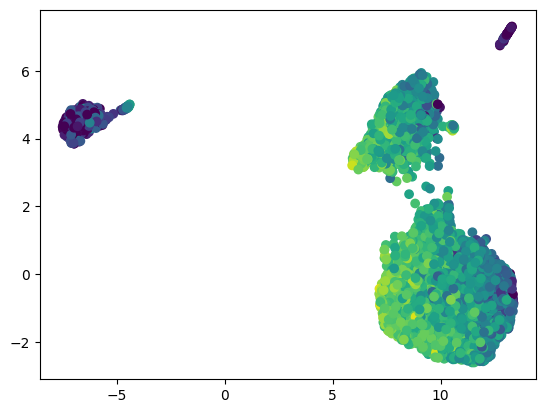

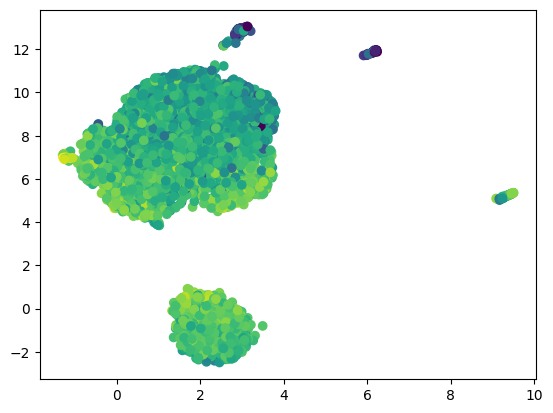

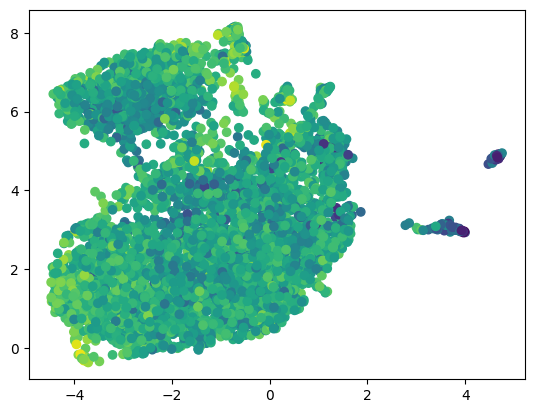

In [21]:
for embedding, df in [(treated_embedding, treated_df), (source_embedding, source_df), (pred_embedding, pred_df)]:
    plt.scatter(embedding[:,0], embedding[:,1], c=df["pRB"])
    plt.show()

In [23]:
import umap
embedding = umap.UMAP().fit_transform(d21["target"][3].squeeze().cpu())

('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)


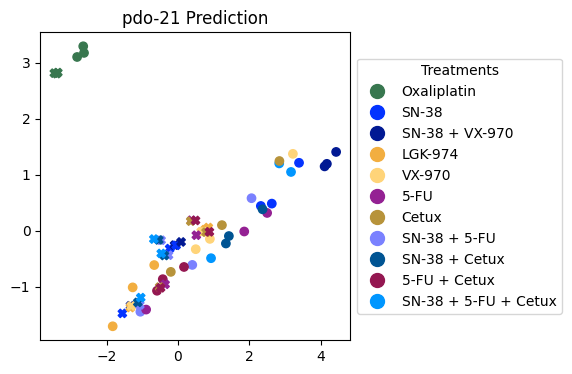

('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)


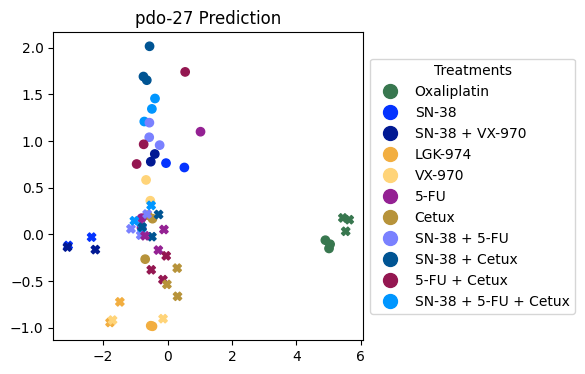

('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('PDO',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)
('F',)


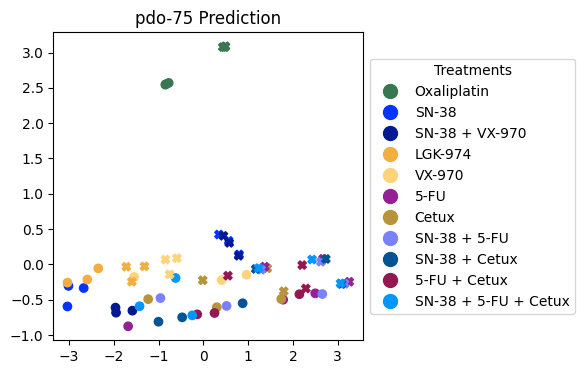

In [99]:
for d in [d21, d27, d75]:
    res =[]
    for distribution, culture in zip(d["target"], d["culture"]):
        if culture[0] != "PDOF":
            continue
        #print(distribution.shape)
        res.append(distribution.mean(axis=1).cpu())
    target_res = np.stack(res).squeeze()
    
    res =[]
    for distribution, culture in zip(d["pred"], d["culture"]):
        if culture[0] != "PDOF":
            continue
        res.append(distribution.mean(axis=0).cpu())
    pred_res = np.stack(res).squeeze()
    
    res =[]
    for distribution, culture in zip(d["source"], d["culture"]):
        if culture[0] != "PDOF":
            continue
        res.append(distribution.mean(axis=1).cpu())
    source_res = np.stack(res).squeeze()
    pca = PCA(n_components=2)
    pca.fit(np.concatenate([target_res, pred_res, source_res], axis=0))
    target = pca.transform(target_res)
    pred = pca.transform(pred_res)
    source = pca.transform(source_res)
    
    plt.figure(figsize=(4, 4))
    
    plt.title(d["patient"][0][0] + " Target")
    plt.scatter(target[:,0], target[:,1], c=pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment))
    #unique_groups = set(treatment_short)
    #colors = set(pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment))
    treats = [d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]
    cs = pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment)
    unique_groups = []
    unique_colors = []
    for t, c in zip(treats, cs):
        if t not in unique_groups:
            unique_groups.append(t)
            unique_colors.append(c)
    
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=name)
        for name, color in zip(unique_groups, unique_colors)
    ]
    plt.legend(handles=legend_handles, title="Treatments", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.savefig(d["patient"][0][0] + "_target.pdf", dpi=300)
    
    plt.title(d["patient"][0][0] + " Prediction")
    plt.scatter(pred[:,0], pred[:,1], c=pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment), marker="X")
    #unique_groups = set(treatment_short)
    #colors = set(pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment))
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=name)
        for name, color in zip(unique_groups, unique_colors)
    ]
    plt.legend(handles=legend_handles, title="Treatments", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.savefig(d["patient"][0][0] + "_prediction.pdf", dpi=300)
    
    plt.show()
    #print(d["cell_cond"])
    #print(pd.Series(d["culture"]).apply(lambda x: x[0]))
    #plt.title(d["patient"][0][0] + "_culture")
    #plt.scatter(pred[:,0], pred[:,1], c=pd.Series(d["culture"]).apply(lambda x: x[0]).map(culture), marker="X")
    #plt.show()

In [ ]:
unique_groups = set(treatment_short)
colors = set(pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment))

In [86]:
treats = [d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]
cs = pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment)
print(treats[0], cs[0])
unique_groups = []
unique_colors = []
for t, c in zip(treats, cs):
    if t not in unique_groups:
        unique_groups.append(t)
        unique_colors.append(c)

print(unique_groups) 
print(unique_colors)

Oxaliplatin #38774F
['Oxaliplatin', 'SN-38', 'SN-38 + VX-970', 'LGK-974', 'VX-970', '5-FU', 'Cetux', 'SN-38 + 5-FU', 'SN-38 + Cetux', '5-FU + Cetux', 'SN-38 + 5-FU + Cetux']
['#38774F', '#0433FF', '#011993', '#F2AE40', '#FFD479', '#942193', '#B7933A', '#7A81FF', '#005493', '#941751', '#0096FF']


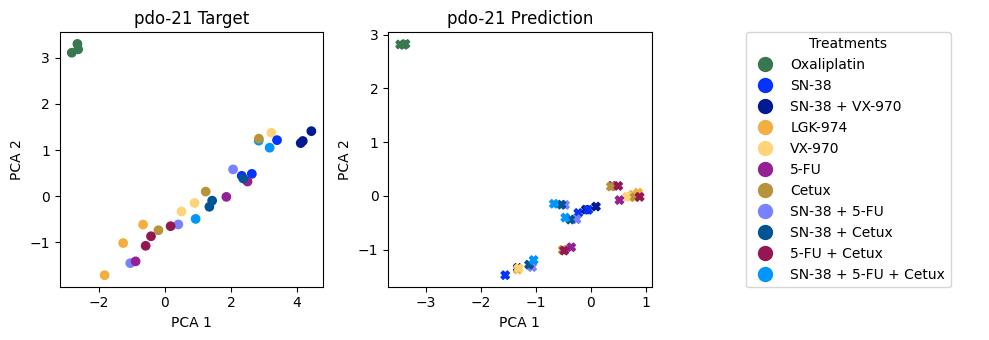

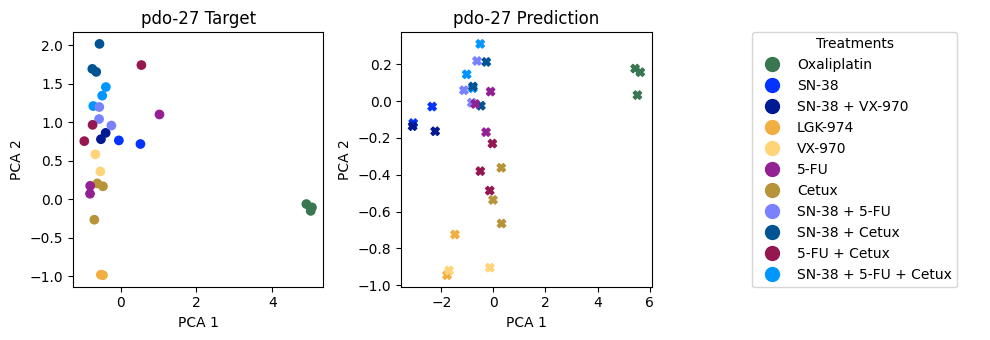

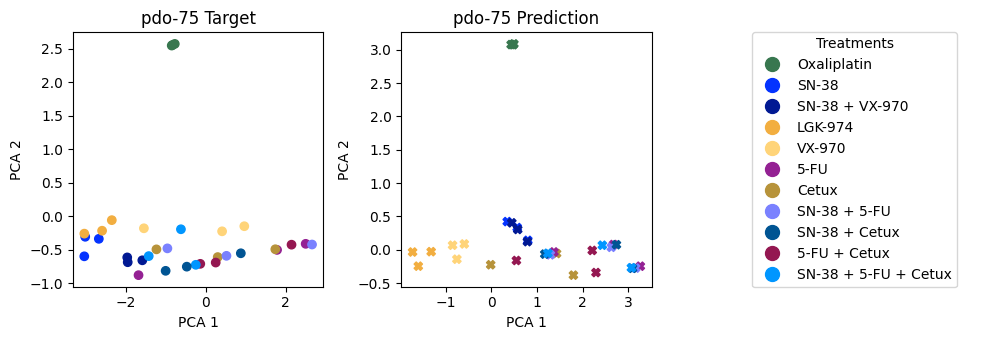

In [100]:
for d in [d21, d27, d75]:
    res =[]
    for distribution, culture in zip(d["target"], d["culture"]):
        if culture[0] != "PDOF":
            continue
        #print(distribution.shape)
        res.append(distribution.mean(axis=1).cpu())
    target_res = np.stack(res).squeeze()
    
    res =[]
    for distribution, culture in zip(d["pred"], d["culture"]):
        if culture[0] != "PDOF":
            continue
        res.append(distribution.mean(axis=0).cpu())
    pred_res = np.stack(res).squeeze()
    
    res =[]
    for distribution, culture in zip(d["source"], d["culture"]):
        if culture[0] != "PDOF":
            continue
        res.append(distribution.mean(axis=1).cpu())
    source_res = np.stack(res).squeeze()
    pca = PCA(n_components=2)
    pca.fit(np.concatenate([target_res, pred_res, source_res], axis=0))
    target = pca.transform(target_res)
    pred = pca.transform(pred_res)
    source = pca.transform(source_res)
    
    # Set up a figure with three subplots in one row
    fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))  # Three columns in one row

    # Target subplot
    axes[0].set_title(d["patient"][0][0] + " Target")
    scatter_target = axes[0].scatter(
        target[:, 0], 
        target[:, 1], 
        c=pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"])
        .map(treatment_short)
        .map(treatment)
    )
    axes[0].set_xlabel("PCA 1")
    axes[0].set_ylabel("PCA 2")

    # Prediction subplot
    axes[1].set_title(d["patient"][0][0] + " Prediction")
    scatter_pred = axes[1].scatter(
        pred[:, 0], 
        pred[:, 1], 
        c=pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"])
        .map(treatment_short)
        .map(treatment),
        marker="X"
    )
    axes[1].set_xlabel("PCA 1")
    axes[1].set_ylabel("PCA 2")

    # Legend subplot
    unique_groups = []
    unique_colors = []
    for t, c in zip(treats, cs):
        if t not in unique_groups:
            unique_groups.append(t)
            unique_colors.append(c)
            
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=name)
        for name, color in zip(unique_groups, unique_colors)
    ]

    # Add the legend to the third subplot
    axes[2].axis("off")  # Turn off the axis for the legend subplot
    axes[2].legend(handles=legend_handles, title="Treatments", loc="center")

    # Save the figure as a single PDF
    plt.tight_layout()
    plt.savefig(d["patient"][0][0] + "_combined.pdf", dpi=300)

    # Show the figure
    plt.show()

In [45]:
set(pd.Series([d for (d, c) in zip(d["treatment"], d["culture"]) if c[0] == "PDOF"]).map(treatment_short).map(treatment))

{'#005493',
 '#0096FF',
 '#011993',
 '#0433FF',
 '#38774F',
 '#7A81FF',
 '#941751',
 '#942193',
 '#B7933A',
 '#F2AE40',
 '#FFD479'}

In [43]:
list(treatment_short.keys())

['Oxaliplatin',
 'SN-38',
 'SN-38 + VX-970',
 'LGK-974',
 'VX-970',
 '5-FU',
 'Cetux',
 'SN-38 + Cetux',
 '5-FU + Cetux',
 'SN-38 + 5-FU + Cetux',
 'SN-38 + 5-FU']

In [38]:
d["treatment"]

['Oxaliplatin',
 'Oxaliplatin',
 'Oxaliplatin',
 'SN-38',
 'SN-38 + VX-970',
 'LGK-974',
 'VX-970',
 'SN-38',
 'SN-38 + VX-970',
 'LGK-974',
 'VX-970',
 'SN-38',
 'SN-38 + VX-970',
 'LGK-974',
 'VX-970',
 '5-FU',
 'Cetux',
 'SN-38 + 5-FU',
 'SN-38 + Cetux',
 '5-FU + Cetux',
 'SN-38 + 5-FU + Cetux',
 '5-FU',
 'Cetux',
 'SN-38 + 5-FU',
 'SN-38 + Cetux',
 '5-FU + Cetux',
 'SN-38 + 5-FU + Cetux',
 '5-FU',
 'Cetux',
 'SN-38 + 5-FU',
 'SN-38 + Cetux',
 '5-FU + Cetux',
 'Oxaliplatin',
 'Oxaliplatin',
 'Oxaliplatin',
 'SN-38',
 'SN-38 + VX-970',
 'LGK-974',
 'VX-970',
 'SN-38',
 'SN-38 + VX-970',
 'LGK-974',
 'VX-970',
 'SN-38',
 'SN-38 + VX-970',
 'LGK-974',
 'VX-970',
 '5-FU',
 'Cetux',
 'SN-38 + 5-FU',
 'SN-38 + Cetux',
 '5-FU + Cetux',
 'SN-38 + 5-FU + Cetux',
 '5-FU',
 'Cetux',
 'SN-38 + 5-FU',
 'SN-38 + Cetux',
 '5-FU + Cetux',
 'SN-38 + 5-FU + Cetux',
 '5-FU',
 'Cetux',
 'SN-38 + 5-FU',
 'SN-38 + Cetux',
 '5-FU + Cetux',
 'SN-38 + 5-FU + Cetux',
 'Oxaliplatin',
 'Oxaliplatin',
 'SN-38',